In [35]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import statsmodels.api as sm

In [37]:
# Loading the Dataset
df = pd.read_excel("Canada_Crude_Oil_Import_Data.xlsx")

In [39]:
df.head()

,Date,GDP (USD),Per Capita (USD),Inflation Rate,Population,Real Interest Rate,Government Net Lending and Borrowing (as a percent of GDP),Canada's Current Account Balance (USD),Crude Oil Production (Cubic Meters),Crude Oil Imports (Cubic Meters),Crude Oil Import Cost (USD),Canada's Crude Oil Refining Capacity (Cubic Meters)
0,1960-12-31,4.056377e+10,2264.9485,0.0136,17909356,0.030100,0.000848,-9.265125e+09,3.728928e+07,16104525.0,789121725.0,6.986317e+06
1,1961-12-31,4.103819e+10,2246.0836,0.0102,18273684,0.030843,-0.004705,-6.286063e+09,3.845643e+07,19022982.0,894080154.0,6.574235e+06
2,1962-12-31,4.233621e+10,2274.4285,0.0106,18622345,0.043416,-0.004470,2.709989e+09,3.966012e+07,19756891.0,948330768.0,7.170606e+06
3,1963-12-31,4.514034e+10,2380.3173,0.0163,18971005,0.034916,-0.000176,-6.274864e+09,4.090148e+07,18847534.0,904681632.0,7.685517e+06
4,1964-12-31,4.950366e+10,2561.6385,0.0191,19326326,0.028378,-0.006983,5.902889e+08,4.218170e+07,16001041.0,800052050.0,7.243771e+06


In [41]:
# Overview of Dataset
df.describe()

,GDP (USD),Per Capita (USD),Inflation Rate,Population,Real Interest Rate,Government Net Lending and Borrowing (as a percent of GDP),Canada's Current Account Balance (USD),Crude Oil Production (Cubic Meters),Crude Oil Imports (Cubic Meters),Crude Oil Import Cost (USD),Canada's Crude Oil Refining Capacity (Cubic Meters)
count,6.500000e+01,65.000000,65.000000,6.500000e+01,65.000000,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01
mean,7.822855e+11,23854.593819,0.037585,2.835290e+07,0.030593,-0.012925,-1.037558e+10,1.183325e+08,4.394801e+07,8.365413e+09,1.150716e+07
std,6.928734e+11,17982.764121,0.029400,6.106435e+06,0.026928,0.027518,2.113734e+10,6.774910e+07,2.964170e+07,7.543561e+09,2.754943e+06
min,4.056377e+10,2246.083600,0.001700,1.790936e+07,-0.041702,-0.109491,-6.462000e+10,3.728928e+07,1.506203e+07,7.891217e+08,6.574235e+06
25%,2.072716e+11,8838.947100,0.017300,2.344211e+07,0.013925,-0.019819,-2.116300e+10,6.105823e+07,1.975689e+07,3.490548e+09,8.847924e+06
50%,5.943874e+11,20794.682200,0.027000,2.834764e+07,0.029142,-0.002339,-6.274864e+09,9.997802e+07,4.008570e+07,5.623015e+09,1.242415e+07
75%,1.468820e+12,42314.061600,0.046933,3.321854e+07,0.045130,0.001507,2.709989e+09,1.637061e+08,4.602046e+07,1.174488e+10,1.364047e+07
max,2.515000e+12,64310.661562,0.124700,3.910705e+07,0.103628,0.026397,2.407200e+10,2.681610e+08,1.455734e+08,3.100713e+10,1.585391e+07


In [43]:
print(df.dtypes)

Date                                                          datetime64[ns]
GDP (USD)                                                            float64
Per Capita (USD)                                                     float64
Inflation Rate                                                       float64
Population                                                             int64
Real Interest Rate                                                   float64
Government Net Lending and Borrowing (as a percent of GDP)           float64
Canada's Current Account Balance (USD)                               float64
Crude Oil Production (Cubic Meters)                                  float64
Crude Oil Imports (Cubic Meters)                                     float64
Crude Oil Import Cost (USD)                                          float64
Canada's Crude Oil Refining Capacity (Cubic Meters)                  float64
dtype: object


In [45]:
# Creating a new column for Year
df["Year"] = df["Date"].dt.year

In [47]:
df.head()

,Date,GDP (USD),Per Capita (USD),Inflation Rate,Population,Real Interest Rate,Government Net Lending and Borrowing (as a percent of GDP),Canada's Current Account Balance (USD),Crude Oil Production (Cubic Meters),Crude Oil Imports (Cubic Meters),Crude Oil Import Cost (USD),Canada's Crude Oil Refining Capacity (Cubic Meters),Year
0,1960-12-31,4.056377e+10,2264.9485,0.0136,17909356,0.030100,0.000848,-9.265125e+09,3.728928e+07,16104525.0,789121725.0,6.986317e+06,1960
1,1961-12-31,4.103819e+10,2246.0836,0.0102,18273684,0.030843,-0.004705,-6.286063e+09,3.845643e+07,19022982.0,894080154.0,6.574235e+06,1961
2,1962-12-31,4.233621e+10,2274.4285,0.0106,18622345,0.043416,-0.004470,2.709989e+09,3.966012e+07,19756891.0,948330768.0,7.170606e+06,1962
3,1963-12-31,4.514034e+10,2380.3173,0.0163,18971005,0.034916,-0.000176,-6.274864e+09,4.090148e+07,18847534.0,904681632.0,7.685517e+06,1963
4,1964-12-31,4.950366e+10,2561.6385,0.0191,19326326,0.028378,-0.006983,5.902889e+08,4.218170e+07,16001041.0,800052050.0,7.243771e+06,1964


In [49]:
# Checking the null values
df.isnull().sum()

Date                                                          0
GDP (USD)                                                     0
Per Capita (USD)                                              0
Inflation Rate                                                0
Population                                                    0
Real Interest Rate                                            0
Government Net Lending and Borrowing (as a percent of GDP)    0
Canada's Current Account Balance (USD)                        0
Crude Oil Production (Cubic Meters)                           0
Crude Oil Imports (Cubic Meters)                              0
Crude Oil Import Cost (USD)                                   0
Canada's Crude Oil Refining Capacity (Cubic Meters)           0
Year                                                          0
dtype: int64

In [55]:
df.rename(columns={"Canada's Crude Oil Refining Capacity (Cubic Meters)":"Crude Oil Refining Capacity (Cubic Meters)"} , inplace = True)

In [57]:
print(df.columns.tolist())  # Prints all column names

['Date', 'GDP (USD)', 'Per Capita (USD)', 'Inflation Rate', 'Population', 'Real Interest Rate', 'Government Net Lending and Borrowing (as a percent of GDP)', "Canada's Current Account Balance (USD)", 'Crude Oil Production (Cubic Meters)', 'Crude Oil Imports (Cubic Meters)', 'Crude Oil Import Cost (USD)', 'Crude Oil Refining Capacity (Cubic Meters)', 'Year']


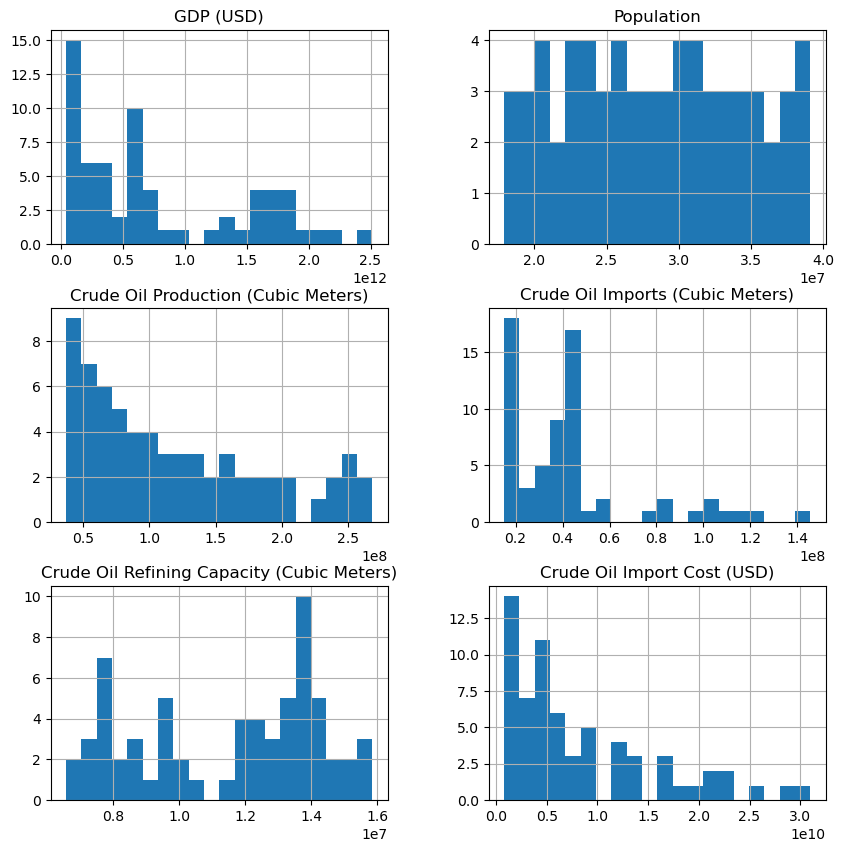

<Figure size 640x480 with 0 Axes>

In [59]:
# Plotting Distribution Charts
df[['GDP (USD)', 'Population', 'Crude Oil Production (Cubic Meters)', 'Crude Oil Imports (Cubic Meters)', 'Crude Oil Refining Capacity (Cubic Meters)', 'Crude Oil Import Cost (USD)']].hist(bins=20, figsize=(10,10))
plt.show()
plt.savefig("Distribution.png", dpi=300, bbox_inches='tight')

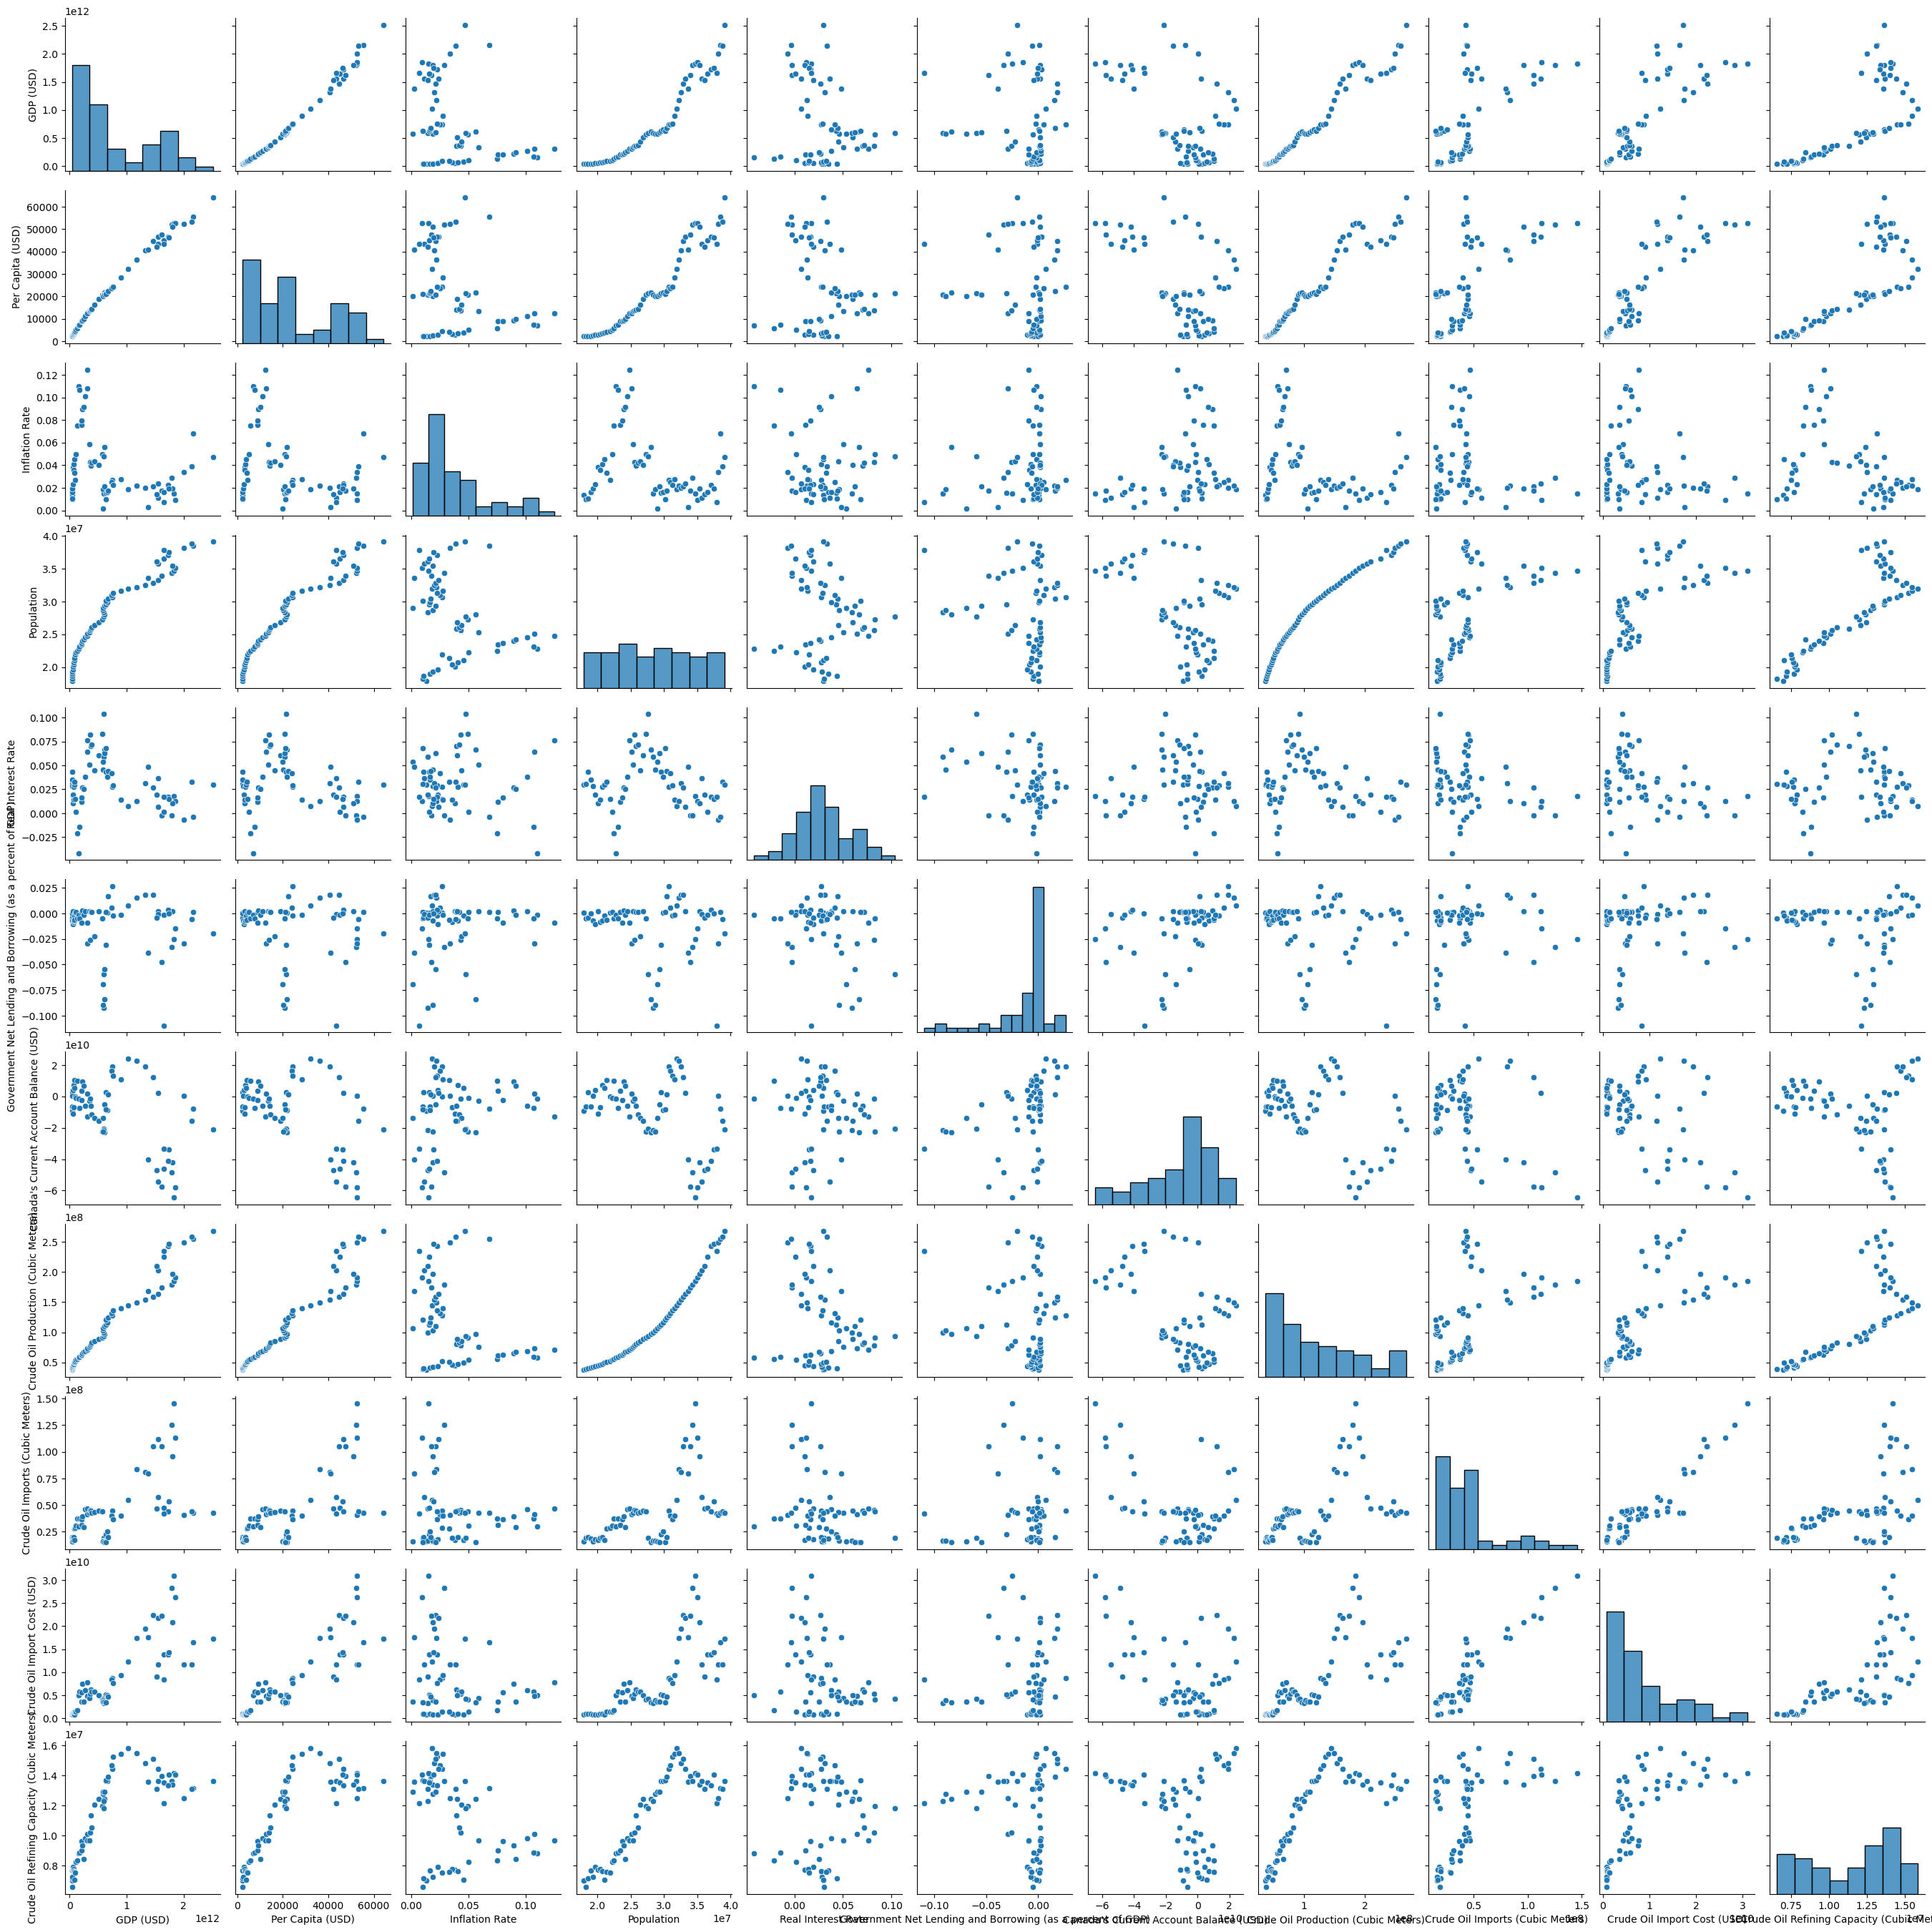

In [62]:
# Pairplot for Relationships Between Variables
sns.pairplot(df[['GDP (USD)', 'Per Capita (USD)', 'Inflation Rate', 'Population',
                 'Real Interest Rate', 'Government Net Lending and Borrowing (as a percent of GDP)',
                 "Canada's Current Account Balance (USD)", 'Crude Oil Production (Cubic Meters)', 
                 'Crude Oil Imports (Cubic Meters)', 'Crude Oil Import Cost (USD)', 
                 'Crude Oil Refining Capacity (Cubic Meters)']])
plt.show()


In [25]:
print(df.columns.tolist())  # Prints all column names


['Date', 'GDP (USD)', ' Per Capita (USD)', 'Inflation Rate', 'Population', 'Real Interest Rate', 'Government Net Lending and Borrowing (as a percent of GDP)', "Canada's Current Account Balance (USD)", 'Crude Oil Production (Cubic Meters)', 'Crude Oil Imports (Cubic Meters)', 'Crude Oil Import Cost (USD)', 'Crude Oil Refining Capacity (Cubic Meters)', 'Year']


In [63]:
selected_columns = ['GDP (USD)', 'Per Capita (USD)', 'Inflation Rate', 'Population', 
                    'Real Interest Rate', 'Government Net Lending and Borrowing (as a percent of GDP)', 
                    "Canada's Current Account Balance (USD)", 'Crude Oil Production (Cubic Meters)', 
                    'Crude Oil Imports (Cubic Meters)', 'Crude Oil Import Cost (USD)', 
                    'Crude Oil Refining Capacity (Cubic Meters)']

In [66]:
corr_matrix = df[selected_columns].corr()

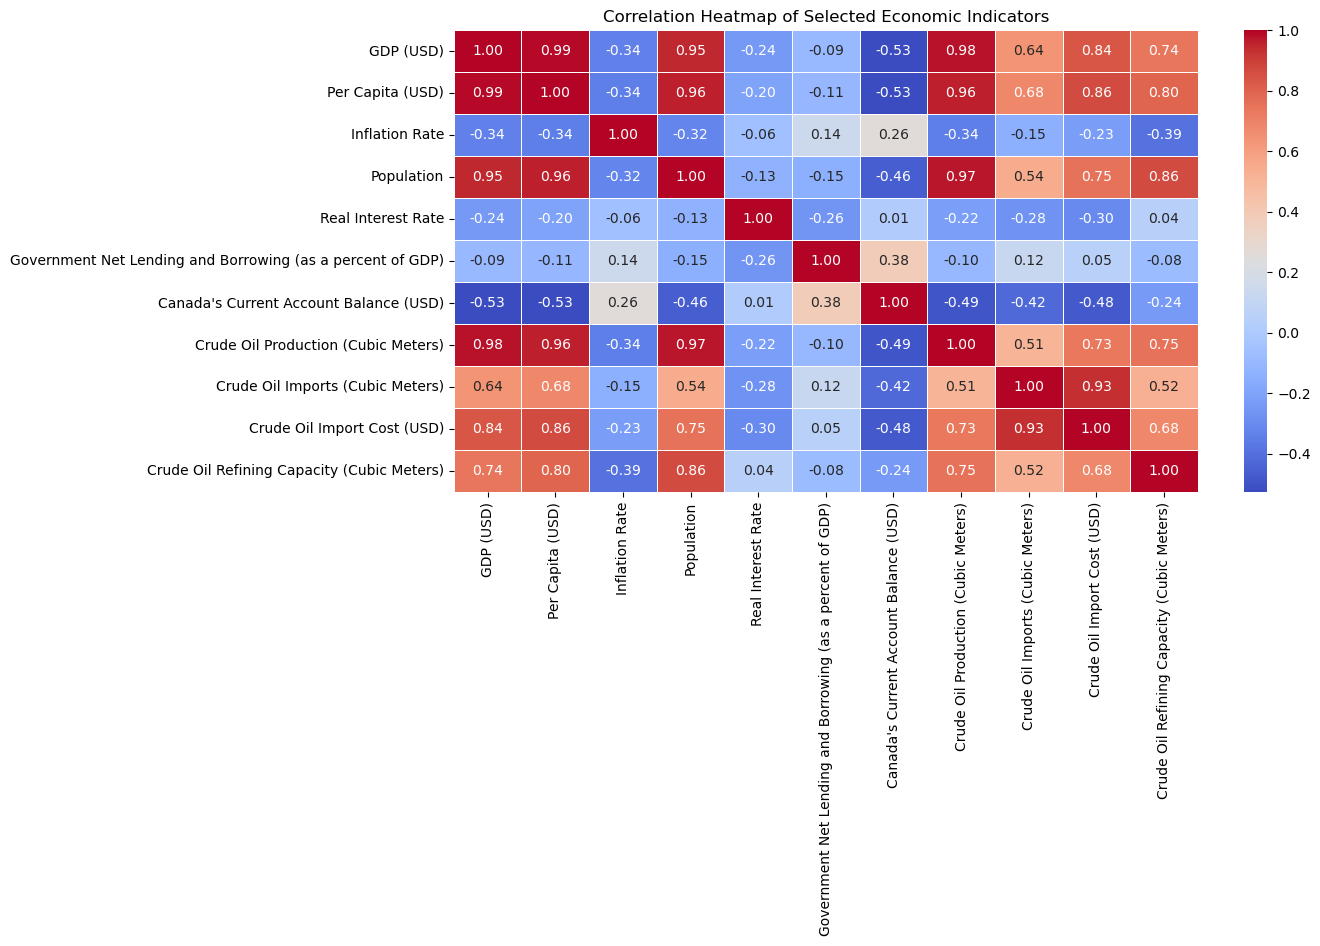

In [68]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))  
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Economic Indicators")
plt.show()

In [70]:
# Defining Target Variable
X = df[['GDP (USD)', 'Per Capita (USD)', 'Inflation Rate', 'Population', 'Real Interest Rate', 'Government Net Lending and Borrowing (as a percent of GDP)',
       "Canada's Current Account Balance (USD)","Crude Oil Production (Cubic Meters)", "Crude Oil Refining Capacity (Cubic Meters)" ]]

y = df[['Crude Oil Imports (Cubic Meters)', 'Crude Oil Import Cost (USD)']]  


In [72]:
# Splitting the dataframe into traina and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Model Training - Random Forest

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [76]:
# Model Prediction - Random Forest

y_pred_rf = rf_model.predict(X_test)

In [78]:
# Model Training - XGBoost 
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [80]:
# Model Prediction - XGBoost
y_pred_xgb = xgb_model.predict(X_test)

In [82]:
# Model Evaluation for Random Forest

print("Random Forest Model Evaluation:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

Random Forest Model Evaluation:
RMSE: 1875445850.0559812
MAE: 683395476.4049891
R²: 0.8458464623673746


In [84]:
# Model Evaluation for XGBoost

print("XGBoost Model Evaluation:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"R²: {r2_score(y_test, y_pred_xgb)}")

XGBoost Model Evaluation:
RMSE: 2257186186.3601027
MAE: 1050613429.8332272
R²: 0.7982793614645496


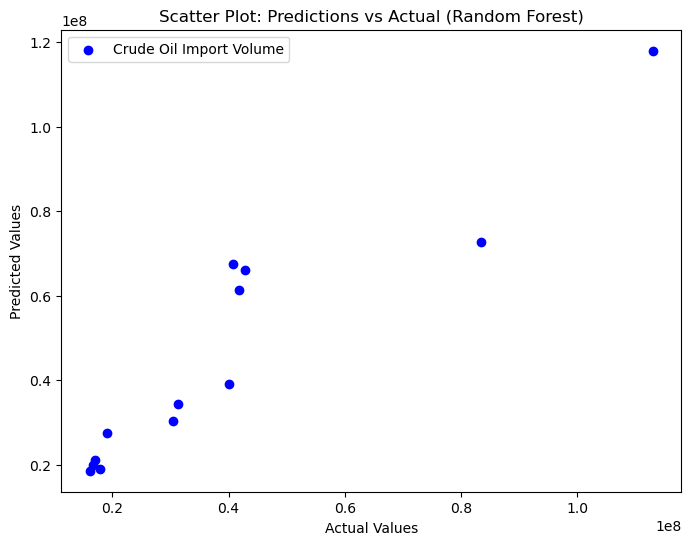

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test['Crude Oil Imports (Cubic Meters)'], y_pred_rf[:, 0], label='Crude Oil Import Volume', color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Scatter Plot: Predictions vs Actual (Random Forest)')
plt.show()

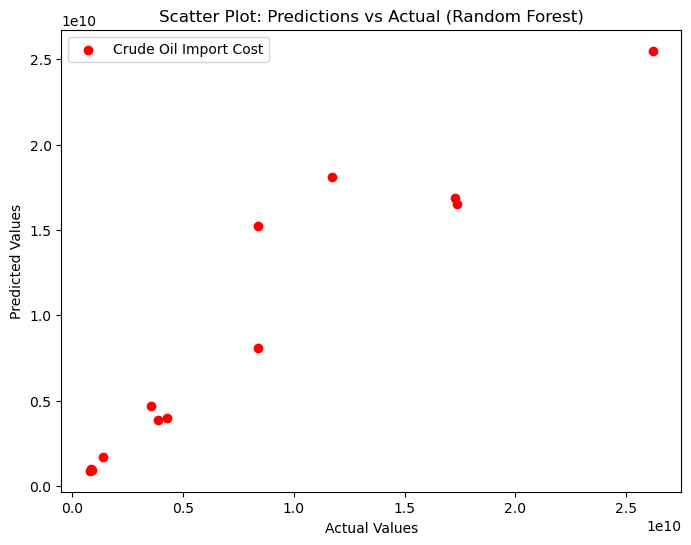

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test['Crude Oil Import Cost (USD)'], y_pred_rf[:, 1], label='Crude Oil Import Cost', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Scatter Plot: Predictions vs Actual (Random Forest)')
plt.show()

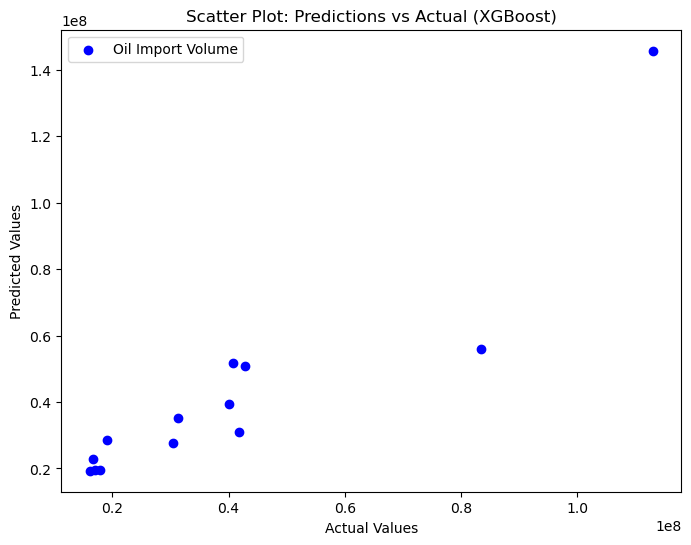

In [94]:
# Scatter Plot of Predictions vs Actual Values for XGBoost

plt.figure(figsize=(8, 6))
plt.scatter(y_test['Crude Oil Imports (Cubic Meters)'], y_pred_xgb[:, 0], label='Oil Import Volume', color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Scatter Plot: Predictions vs Actual (XGBoost)')
plt.show()


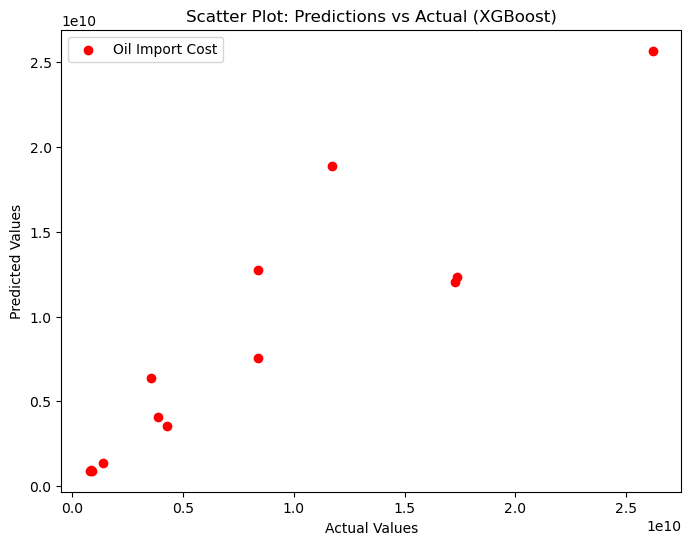

In [96]:
# Scatter Plot of Predictions vs Actual Values for XGBoost

plt.figure(figsize=(8, 6))
plt.scatter(y_test['Crude Oil Import Cost (USD)'], y_pred_xgb[:, 1], label='Oil Import Cost', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Scatter Plot: Predictions vs Actual (XGBoost)')
plt.show()


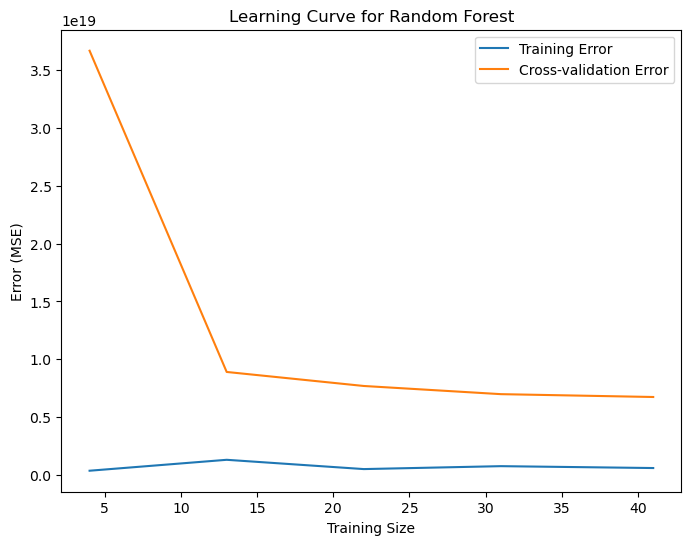

In [98]:
# Learning Curve for Random Forest

train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training Error")
plt.plot(train_sizes, -test_scores.mean(axis=1), label="Cross-validation Error")
plt.xlabel('Training Size')
plt.ylabel('Error (MSE)')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.show()


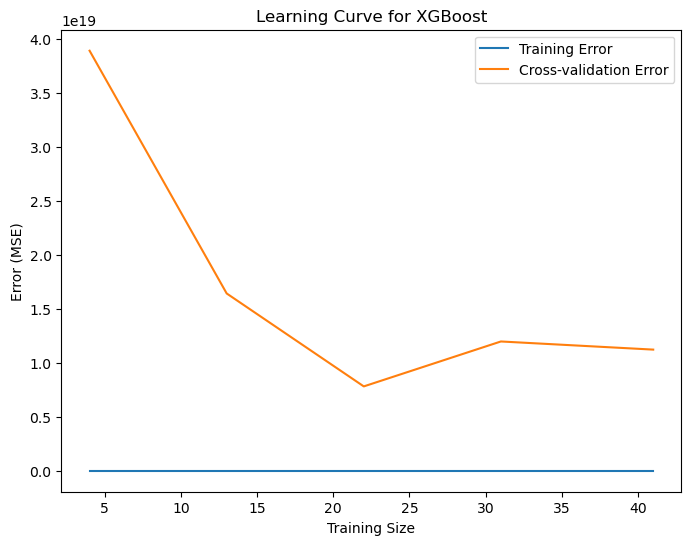

In [99]:
# Learning Curve for XGBoost

train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training Error")
plt.plot(train_sizes, -test_scores.mean(axis=1), label="Cross-validation Error")
plt.xlabel('Training Size')
plt.ylabel('Error (MSE)')
plt.title('Learning Curve for XGBoost')
plt.legend()
plt.show()


In [102]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [103]:
# Hyperparameter Tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 6],
    'subsample': [0.8, 1]
}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [104]:
# 18. Other Performance Metrics (Random Forest)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE:", mse_rf)
print("Random Forest - MAE:", mae_rf)
print("Random Forest - RMSE:", rmse_rf)
print("Random Forest - R²:", r2_rf)


Random Forest - MSE: 3.5172971364922015e+18
Random Forest - MAE: 683395476.4049891
Random Forest - RMSE: 1875445850.0559812
Random Forest - R²: 0.8458464623673746


In [105]:
# 19. Other Performance Metrics (XGBoost)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - MSE:", mse_xgb)
print("XGBoost - MAE:", mae_xgb)
print("XGBoost - RMSE:", rmse_xgb)
print("XGBoost - R²:", r2_xgb)


XGBoost - MSE: 5.094889479894865e+18
XGBoost - MAE: 1050613429.8332272
XGBoost - RMSE: 2257186186.3601027
XGBoost - R²: 0.7982793614645496


In [140]:
# Taking Input from User and Predicting Oil Import Volume and Cost

print("Please enter the following values:")
gdp = float(input("GDP (USD): ")) * 1e9  # Convert GDP to actual value in USD
per_capita = float(input("Per Capita (USD): "))
inflation_rate = float(input("Inflation Rate (%): "))
population = float(input("Population: "))
oil_production = float(input("Crude Oil Production (Cubic Meters): "))
oil_refining_capacity = float(input("Crude Oil Refining Capacity (Cubic Meters): "))
real_interest_rate = float(input("Real Interest Rate: "))
gov_net_lend_borrow = float(input("Government Net Lending and Borrowing (as a percent of GDP): "))
current_acc_bal = float(input("Canada's Current Account Balance (USD): "))

Please enter the following values:


GDP (USD):  2017918642589
Per Capita (USD):  47081
Inflation Rate (%):  0.07
Population:  38248327
Crude Oil Production (Cubic Meters):  249274363
Crude Oil Refining Capacity (Cubic Meters):  13655790
Real Interest Rate:  0.0434
Government Net Lending and Borrowing (as a percent of GDP):  -0.02
Canada's Current Account Balance (USD):  -286450000000


In [146]:
# Prepare the input data in the same format as the training data
input_data = pd.DataFrame({
    'GDP (USD)': [gdp],
    'Per Capita (USD)': [per_capita],
    'Inflation Rate': [inflation_rate],
    'Population': [population],
    'Real Interest Rate': [real_interest_rate],
    'Government Net Lending and Borrowing (as a percent of GDP)': [gov_net_lend_borrow],
    "Canada's Current Account Balance (USD)": [current_acc_bal],
    'Crude Oil Production (Cubic Meters)': [oil_production],
    'Crude Oil Refining Capacity (Cubic Meters)': [oil_refining_capacity]   
})


In [130]:
print(df.columns.tolist())  # Prints all column names


['Date', 'GDP (USD)', 'Per Capita (USD)', 'Inflation Rate', 'Population', 'Real Interest Rate', 'Government Net Lending and Borrowing (as a percent of GDP)', "Canada's Current Account Balance (USD)", 'Crude Oil Production (Cubic Meters)', 'Crude Oil Imports (Cubic Meters)', 'Crude Oil Import Cost (USD)', 'Crude Oil Refining Capacity (Cubic Meters)', 'Year']


In [148]:
# Make Predictions using Random Forest and XGBoost

rf_prediction = rf_model.predict(input_data)  # Predict with Random Forest

xgb_prediction = xgb_model.predict(input_data)  # Predict with XGBoost


In [150]:
# Output the predictions to the user

print("\nPredicted Oil Import Volume (cubic meters) and Oil Import Cost (USD):")
print(f"Random Forest Prediction - Oil Import Volume: {rf_prediction[0][0]:,.2f} cubic meters")
print(f"Random Forest Prediction - Oil Import Cost: ${rf_prediction[0][1]:,.2f}")
print(f"XGBoost Prediction - Oil Import Volume: {xgb_prediction[0][0]:,.2f} cubic meters")
print(f"XGBoost Prediction - Oil Import Cost: ${xgb_prediction[0][1]:,.2f}")



Predicted Oil Import Volume (cubic meters) and Oil Import Cost (USD):
Random Forest Prediction - Oil Import Volume: 85,660,091.06 cubic meters
Random Forest Prediction - Oil Import Cost: $19,745,629,622.00
XGBoost Prediction - Oil Import Volume: 119,931,248.00 cubic meters
XGBoost Prediction - Oil Import Cost: $21,493,190,656.00


In [112]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

Per Capita (USD)                                              0.271993
GDP (USD)                                                     0.235249
Crude Oil Production (Cubic Meters)                           0.200238
Population                                                    0.180984
Canada's Current Account Balance (USD)                        0.041746
Government Net Lending and Borrowing (as a percent of GDP)    0.028957
Crude Oil Refining Capacity (Cubic Meters)                    0.018802
Real Interest Rate                                            0.011019
Inflation Rate                                                0.011012
dtype: float64
